<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/VPB_16092021_News_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - News Auto Report**

* Xác định số lượng bài báo theo thời gian
* Xác định độ yêu thích bài báo theo thời gian
* Xác định các nguồn đăng của bài báo
* Topic Cluster & Keyword Maps

In [ ]:
a = input('Nhập mã cần search: ')

Nhập mã cần search: vpb


In [ ]:
#@title Import thư viện { run: "auto", vertical-output: true }
import requests
import time
import pandas as pd
import pandas as pd
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,title,description,date,totalLikes,totalReplies,totalShares,postGroup.name,postSource.name,postSource.url,postSource,month
0,"20 doanh nghiệp niêm yết tồn kho bất động sản ""chất đống"" 315.000 tỷ đồng","Theo thống kê, hơn 20 doanh nghiệp bất động sản niêm yết có hàng tồn kho cao nhất tính đến thời điểm cuối tháng 6 là 315.781 tỷ đồng, tăng 6% so với con số đầu năm...\r\n",2021-09-16,0,0,0,Thị trường,VnEconomy,http://vneconomy.vn/,NaN,2021-09-01
1,"VPB: Giải mã sự bứt tốc của VPBank: Chỉ hơn 10 năm, nhà băng tầm trung 'lột xác' vươn lên top đầu khối tư nhân, vượt mặt nhiều ngân hàng “đồng trang lứa” như thế nào?","Năm 2020, VPBank giữ vị trí ngân hàng thương mại cổ phần tư nhân có doanh thu (TOI) lớn nhất thị trường đạt hơn 39 nghìn tỷ đồng. Các chỉ số hiệu quả tiếp tục ở nhóm dẫn đầu hệ thống các ngân hàng thương mại Việt Nam, với ROA đạt 2,6%và ROE đạt 22%.\r\n",2021-09-16,4,4,0,Doanh nghiệp,Tạp chí Doanh nghiệp & Tiếp thị,https://doanhnghieptiepthi.vn/,NaN,2021-09-01
2,VPB: Thông báo về việc giải tỏa ESOP 2018 đợt 3,VPB: Thông báo về việc giải tỏa ESOP 2018 đợt 3,2021-09-15,0,2,0,Doanh nghiệp,HSX,https://www.hsx.vn/,NaN,2021-09-01
3,Cổ phiếu ngược sóng,"Dù thị trường chứng khoán tiếp tục biến động tích cực trong hơn 3/4 quãng đường của năm 2021 nhưng nhiều cổ phiếu vẫn giảm sâu.\r\nYEG vẫn giao dịch ở vùng đáy và hiện chỉ còn 15.450 đồng/cp.\r\n""Ông lớn"" trong mảng bia là SAB cũng giảm sâu trước ảnh hưởng nặng nề từ dịch Covid-19.",2021-09-15,4,2,0,Thị trường,Người đồng hành,https://ndh.vn/,NaN,2021-09-01
4,"FE Credit chuyển đổi hình thức pháp lý, thương vụ bán vốn cho Sumitomo Mitsui sắp hoàn tất?","FE Credit được chấp thuận chuyển đổi từ Công ty TNHH một thành viên thành Công ty TNHH hai thành viên trở lên. Theo thỏa thuận được ký hồi cuối tháng 4, FE Credit sẽ có 3 cổ đông, trong đó VPBank nắm 50%, Sumitomo Mitsui nắm 49% và Chứng khoán Bản Việt nắm 1%.\r\n",2021-09-11,5,14,0,Doanh nghiệp,Tạp chí Doanh nghiệp & Tiếp thị,https://doanhnghieptiepthi.vn/,NaN,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...
682,"Nhiều cổ phiếu lớn hồi phục, thị trường tăng điểm trở lại",Thị trường hồi phục nhẹ trở lại ngay từ đầu phiên giao dịch với sự phân hóa ở nhóm cổ phiếu trụ cột.\r\n,2020-01-07,0,0,0,Thị trường,NaN,NaN,NaN,2020-01-01
683,VPB: Thông báo ngày ĐKCC lấy ý kiến cổ đông bằng văn bản,VPB: Thông báo ngày ĐKCC lấy ý kiến cổ đông bằng văn bản,2020-01-06,0,0,0,Doanh nghiệp,HSX,https://www.hsx.vn/,NaN,2020-01-01
684,"Các công ty chứng khoán ưa thích các ngành, cổ phiếu nào trong năm 2020?","Báo cáo chiến lược của một số công ty chứng khoán (CTCK) cho thấy thị trường chứng khoán năm 2020 sẽ có phần tích cực hơn nhưng không có quá nhiều bước tiến đáng kể.Một số cổ phiếu của các ngành như ngân hàng, bất động sản khu công nghiệp... được dự báo sẽ có triển vọng tốt ở năm 2020.",2020-01-05,0,0,0,Thị trường,NaN,NaN,NaN,2020-01-01
685,"Bán mạnh cuối phiên, thị trường đảo chiều giảm điểm",Thị trường duy trì sự tích cực trong phần lớn thời gian của phiên giao dịch nhưng áp lực bán bất ngờ dâng cao và đẩy các chỉ số lùi xuống dưới mốc tham chiếu.\r\n,2020-01-03,0,0,0,Thị trường,NaN,NaN,NaN,2020-01-01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


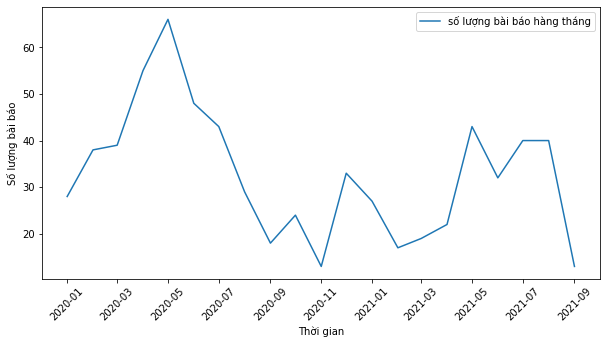

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


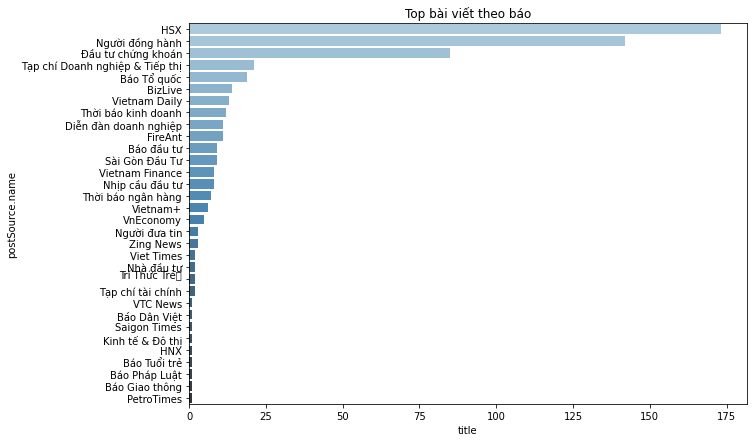

## **Xác định topic được yêu thích (top like, feedback)**

In [ ]:
data.sort_values('totalLikes', ascending=False).head(10)

,title,description,date,totalLikes,totalReplies,totalShares,postGroup.name,postSource.name,postSource.url,postSource,month
42,"MBKE - 3 cổ phiếu ngân hàng được khuyến nghị cho nửa cuối năm gồm TCB, VCB và VPB","Chia sẻ trong buổi hội thảo trực tuyến diễn ra cuối tuần qua do Công ty chứng khoán Maybank Kim Eng (MBKE) tổ chức, các chuyên gia của MBKE cho rằng, khi định giá cổ phiếu ngân hàng, nên nhìn vào chỉ số P/B sẽ phản ánh đúng hơn P/E.",2021-08-09,23,36,0,Thị trường,Đầu tư chứng khoán,https://tinnhanhchungkhoan.vn/,NaN,2021-08-01
102,Cổ phiếu cần quan tâm ngày 24/6,Trích báo cáo phân tích một số cổ phiếu cần quan tâm trước phiên 24/6 của các công ty chứng khoán.,2021-06-23,22,32,0,Doanh nghiệp,Đầu tư chứng khoán,https://tinnhanhchungkhoan.vn/,NaN,2021-06-01
141,"Tư duy đầu tư của ""Hoa hậu chứng khoán"" Mai Phương Thúy: Nếu mất ngủ vì 10 triệu đồng thì làm sao kiếm được 20 triệu!","Quan điểm của Mai Phương Thúy là phải chấp nhận thất bại, đối diện với rủi ro. Chưa có thất bại lớn, có thể do may mắn nhưng cô luôn chuẩn bị cho thất bại lớn.\r\n",2021-05-19,19,43,0,Thị trường,Tạp chí Doanh nghiệp & Tiếp thị,https://doanhnghieptiepthi.vn/,NaN,2021-05-01
262,Nhịp Đập Thị Trường - 23/12/2020: Áp lực chốt lời cuối phiên ở nhóm cổ phiếu ngân hàng khiến VN-Index có thêm ngày phân phối- Update CTD,"Chỉ số VNINDEX tăng điểm khá ấn tượng trong suốt phần lớn phiên giao dịch. Tuy nhiên, bên bán bắt đầu chốt lời ở phiên giao dịch buổi chiều khiến chỉ số VNINDEX giảm điểm.",2020-12-23,15,1,0,Thị trường,FireAnt,https://www.fireant.vn,NaN,2020-12-01
17,"Techcombank, VPBank có thể tái đàm phán bancassurance với phí trả trước cao hơn nhiều lần?","CTCK Yuanta Việt Nam ước tính VPBank tái đàm phán bancassurance với đối tác với phí trước cao hơn, riêng VPBank ước tính có thể đạt 8.000 tỷ đồng.\r\nHDBank có thể nhận phí trả trước 7.000 tỷ đồng phí trả trước khi tái ký hợp đồng bancassurance.\r\nThu nhập phí là động lực tăng trưởng nửa cuối năm.\r\nNgân hàng Nhà nước được kỳ vọng có thể nới ""room"" tín dụng cho các TCTD để hỗ trợ hồi phục kinh tế.",2021-08-26,15,77,0,Tài chính,Người đồng hành,https://ndh.vn/,NaN,2021-08-01
284,Nhịp Đập Thị Trường 1/12/2020: Nến Strong Line + xuất hiện,Strong Line là mẫu hình chỉ có một thân nên được phân loại như là mẫu hình đảo chiều tăng giá hoặc tiếp diễn xu hướng tăng tùy thuộc vào bối cảnh thị trường.,2020-12-01,14,8,0,Thị trường,FireAnt,https://www.fireant.vn,NaN,2020-12-01
16,VPB: Cổ phiếu đang giao dịch dưới giá trị thực?,"Thị trường chứng khoán đã có những điều chỉnh vào quý III/2021 do sự bùng phát của Covid-19, trong đó đáng chú ý là sự điều chỉnh của dòng bank đã đưa định giá của nhóm này về mức đáng quan tâm hơn so với định giá vào quý II/2021.",2021-08-27,14,50,0,Doanh nghiệp,Đầu tư chứng khoán,https://tinnhanhchungkhoan.vn/,NaN,2021-08-01
9,"Biến động nhân sự các doanh nghiệp top đầu sàn chứng khoán: Masan & Thế giới Di động cắt giảm hàng nghìn người, VPBank & FPT tuyển nhiều nhất","Đáng chú ý nhất là trường hợp của HAGL Agrico, công ty này cắt giảm 972 nhân sự, tương ứng tỷ lệ cắt giảm 43% trong 6 tháng đầu năm.",2021-09-08,13,12,0,Doanh nghiệp,Báo Tổ quốc,http://toquoc.vn/,NaN,2021-09-01
110,Nhà đầu tư thận trọng với tin đồn thanh tra “thao túng giá” cổ phiếu ngân hàng,Nhiều câu hỏi và thông tin từ nhà đầu tư gửi về BizLIVE đề nghị xác minh tin đồn thanh tra “thao túng giá” cổ phiếu một số ngân hàng thương mại.,2021-06-15,12,51,0,Thị trường,BizLive,https://bizlive.vn/,NaN,2021-06-01
104,"VPB: Gần 2 tháng sau khi họp Đại hội cổ đông thống nhất không chia cổ tức, ban lãnh đạo VPBank bất ngờ đổi ý",VPBank sẽ chốt danh sách cổ đông vào ngày 13/7 để xin ý kiến việc chia cổ tức bằng cổ phiếu và phát hành cổ phiếu tăng vốn điều lệ.\r\n,2021-06-22,12,36,0,Doanh nghiệp,Tạp chí Doanh nghiệp & Tiếp thị,https://doanhnghieptiepthi.vn/,NaN,2021-06-01


# **Xác định chủ đề chính trong n mô tả của n bài báo**

Processing step 1: Lower case
Done ---- >>> Next step:
Processing step 2: Removed Https tag
Done ---- >>> Next step:
Processing step 3: Tokenize lớp thứ 1
Processing step 4: Tokenize lớp thứ 2
Done.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 869 ms, sys: 0 ns, total: 869 ms
Wall time: 870 ms


### **Xác định danh từ riêng**

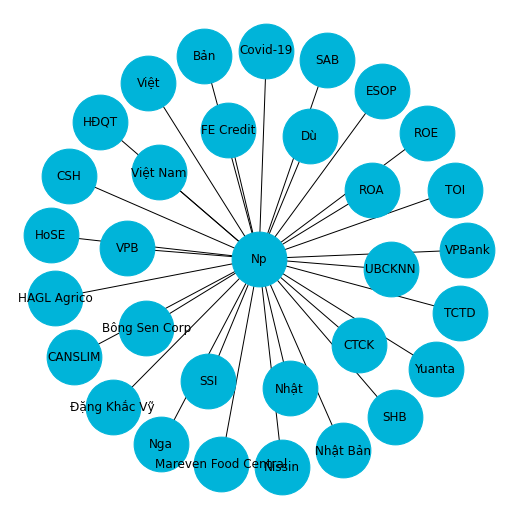

# **Graph Keyword Cluster**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


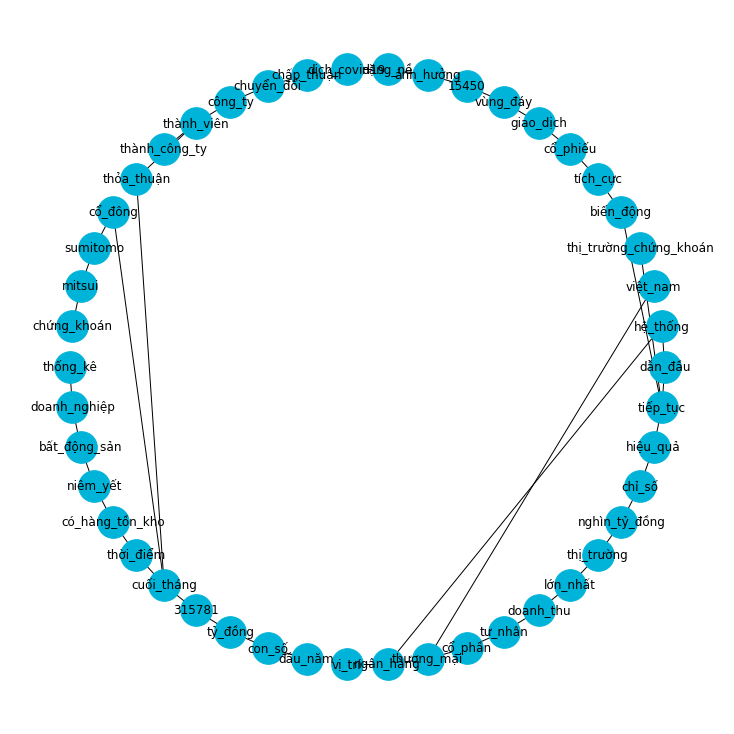